In [1]:
import pickle
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List
import numpy as np
from scipy.stats import gaussian_kde
from transformers import AutoTokenizer

text_tokenizer = AutoTokenizer.from_pretrained('gpt2')

In [16]:
def plot_dist(data: List[int], n_bins: int, save_path: str = ""):
    fig, ax1 = plt.subplots()
    count, bins, _ = ax1.hist(data, n_bins)
    plt.yscale('log')
    x = np.linspace(-2, max(data) + 10)
    ax2 = ax1.twinx()
    h = np.log1p(count)
    resamples = np.random.choice((bins[:-1] + bins[1:])/2, size=5000, p=h/h.sum())
    rkde = gaussian_kde(resamples)
    ax2.plot(x, rkde.pdf(x), c='r', lw=2, label='resampled KDE')
    ax2.set_yticks([])
    plt.show()

In [3]:
with open("../data/datasets/uniref50_gpt_data.pkl", "rb") as f:
    d = pickle.load(f)

In [102]:
x = []
for v in tqdm(d.values()):
    for i in v['fields']:
        x.append(i.split(':')[0])
print(set(x))

100%|██████████| 257167/257167 [00:00<00:00, 449923.07it/s]


{'subunit', 'subcellular location', 'pH dependence', 'protein size', 'taxonomy', 'cofactor', 'functional domains', 'temperature dependence', 'catalytic activity'}


In [101]:
len(d)

257167

In [4]:
summary, questions, answers = [], [], []
for v in tqdm(d.values()):
    summary += v['summary']
    q, s = zip(*[i.split('?') for i in v['qa']])
    questions += q
    answers += s
    for x in s:
        if len(x.split()) == 0:
            break

100%|██████████| 257167/257167 [00:02<00:00, 122420.08it/s]


In [5]:
for m, n in zip([summary, questions, answers], ["summary", "questions", "answers"]):
    print(n, len(m), len(set(m)))

summary 1333778 861100
questions 1972052 97720
answers 1972052 782919


In [6]:
a = [len(i.split()) for i in summary]
b = [len(i.split()) for i in questions]
c = [len(i.split()) for i in answers]

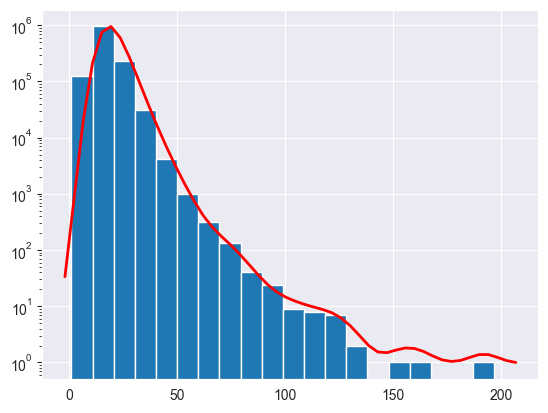

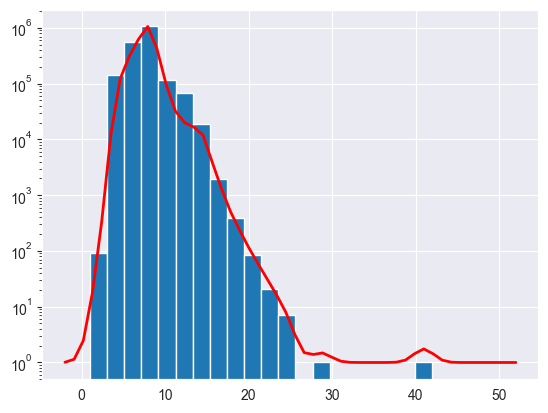

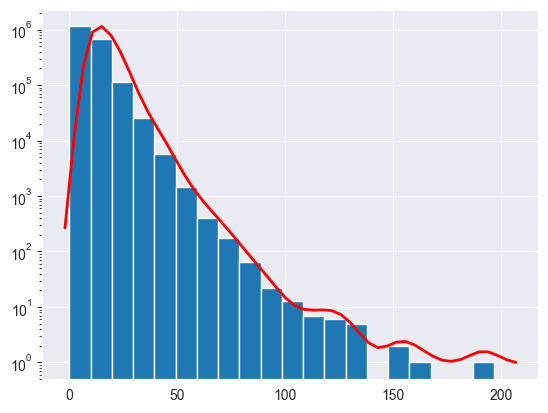

In [17]:
plot_dist(a, 20)
plot_dist(b, 20)
plot_dist(c, 20)

In [8]:
at = [len(text_tokenizer(i)['input_ids']) for i in tqdm(summary)]
print(len(at))
bt = [len(text_tokenizer(i)['input_ids']) for i in tqdm(questions)]
print(len(bt))
ct = [len(text_tokenizer(i)['input_ids']) for i in tqdm(answers)]
print(len(ct))

100%|██████████| 1333778/1333778 [01:54<00:00, 11639.26it/s]


1333778


100%|██████████| 1972052/1972052 [01:40<00:00, 19536.97it/s]


1972052


100%|██████████| 1972052/1972052 [02:04<00:00, 15880.56it/s]

1972052


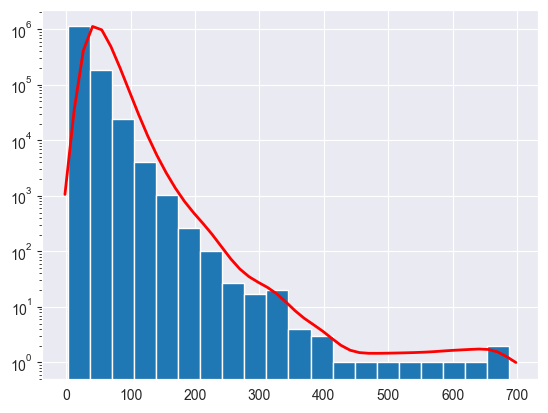

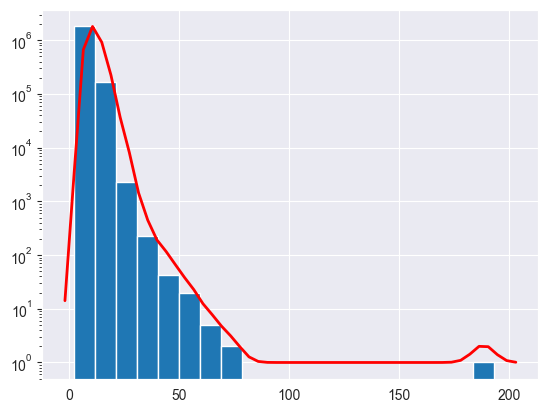

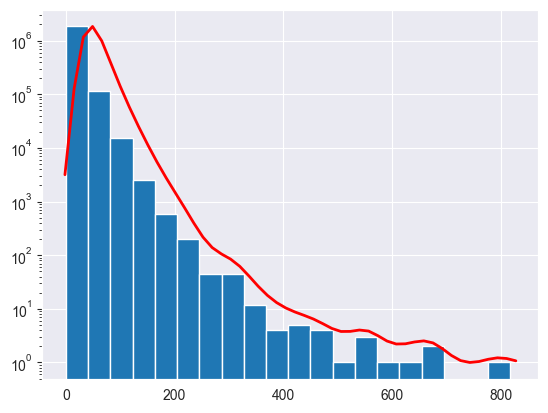

In [18]:
plot_dist(at, 20)
plot_dist(bt, 20)
plot_dist(ct, 20)

In [20]:
sum(at)/1e6, sum(bt)/1e6, sum(ct)/1e6

(36.373665, 16.799215, 32.597143)

In [21]:
questions[:10]

['What is the molecular weight of the protein',
 'What is the catalytic activity of the protein',
 'What is the size of the protein in terms of amino acids',
 'Which phylum does the protein belong to',
 'What domains can be found in the protein',
 'What class does the protein belong to',
 'What is the subunit composition of the protein',
 'What is the taxonomy of the protein',
 'What reactions can the protein catalyze',
 'How does the presence of 8-amino-isoquinoline adenine dinucleotide (3AD) affect the protein']

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def plot_frequency_bars(frequency_dict):
    """
    Plots bar charts where each bar represents a list of frequencies.
    Sections of each bar are colored differently if the value is larger than 0.01; others are grey.

    :param frequency_lists: A list of lists, where each inner list contains frequency values summing to 1.
    """
    frequency_lists = []
    text_list = []
    for k in tqdm(frequency_dict):
        _q, _c = zip(*sorted(tuple(frequency_dict[k].items()), key=lambda x: x[1], reverse=True))
        frequency_lists.append([i/sum(_c) for i in _c])
        text_list.append(_q)
    n_bars = len(frequency_lists)
    bar_width = 0.8

    fig, ax = plt.subplots()
    for i, (frequencies, texts) in tqdm(enumerate(zip(frequency_lists, text_list))):
        bottom = 0
        for freq, text in zip(frequencies, texts):
            ax.bar(i, freq, bottom=bottom, width=bar_width)
            if freq > 0.05:
                ax.text(i, bottom + freq / 2, text, ha='center', va='center')
            bottom += freq

    ax.set_xticks(range(n_bars))
    ax.set_xticklabels([f'List {i+1}' for i in range(n_bars)])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Frequency Lists')
    plt.show()


In [91]:
from collections import defaultdict
# qs = defaultdict(lambda: defaultdict(int))
# for i in questions:
#     for n,j in enumerate(i.split()[:10]):
#         qs[n+1][j] += 1
anss = defaultdict(lambda: defaultdict(int))
for i in answers:
    for n,j in enumerate(i.split()[:10]):
        anss[n+1][j] += 1

100%|██████████| 10/10 [00:00<00:00, 10.71it/s]


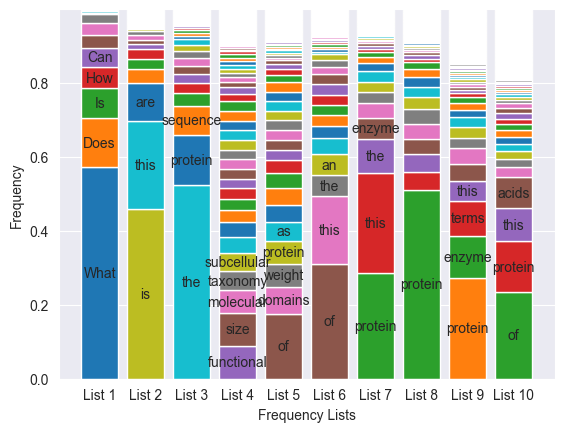

In [88]:
plot_frequency_bars(qs)

In [92]:
plot_frequency_bars(anss)

 70%|███████   | 7/10 [00:42<00:18,  6.11s/it]


KeyboardInterrupt: 